<a href="https://colab.research.google.com/github/alexagdr90/Colab/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. CARGAMOS LIBRERIAS


In [5]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


###2. DESCARGAMOS DATOS

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


###3. ETIQUETAS PARA CLASIFICAR LOS DATOS

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###4. EXPLORAMOS LOS DATOS

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

###5. PRE-PROCESANDO DATOS

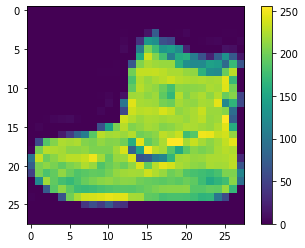

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

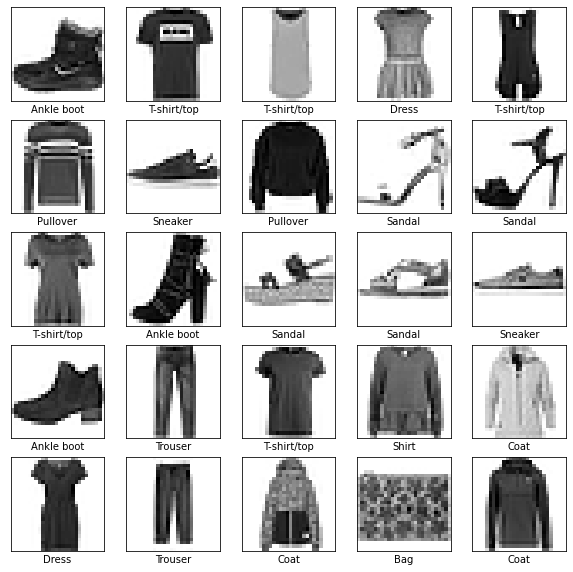

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###6. CONSTRUIR MODELO


###6.1 CAPAS

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

###6.2 COMPILAR EL MODELO

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###7. ENTRENAR EL MODELO

In [28]:
model.fit(train_images, train_labels, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1541 - accuracy: 0.9428
Epoch 2/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1510 - accuracy: 0.9425
Epoch 3/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1483 - accuracy: 0.9435
Epoch 4/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9459
Epoch 5/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1426 - accuracy: 0.9464
Epoch 6/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1369 - accuracy: 0.9490
Epoch 7/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1337 - accuracy: 0.9495
Epoch 8/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1334 - accuracy: 0.9501
Epoch 9/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1308 - accuracy: 0.9507
Epoch 10/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.125

###8. EVALUAR EXACTITUD

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4640 - accuracy: 0.8870 - 412ms/epoch - 1ms/step

Test accuracy: 0.8870000243186951


###9. HACER PREDICCIONES

In [30]:
predictions = model.predict(test_images)

In [31]:
predictions[0]

array([4.0539005e-10, 4.6524306e-18, 1.0441495e-12, 1.3805528e-20,
       5.7109563e-13, 5.8123499e-07, 2.1754843e-16, 7.1281363e-04,
       8.3829534e-17, 9.9928659e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

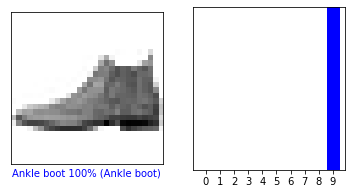

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

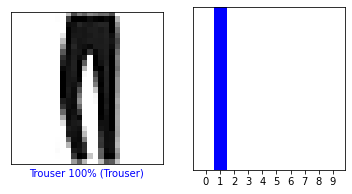

In [36]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

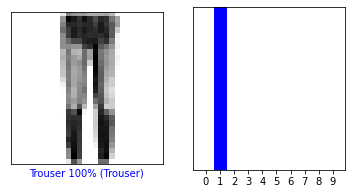

In [37]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

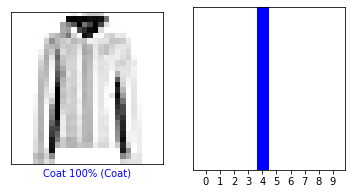

In [38]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

###10. GRAFICAR MULTIPLES IMAGENES

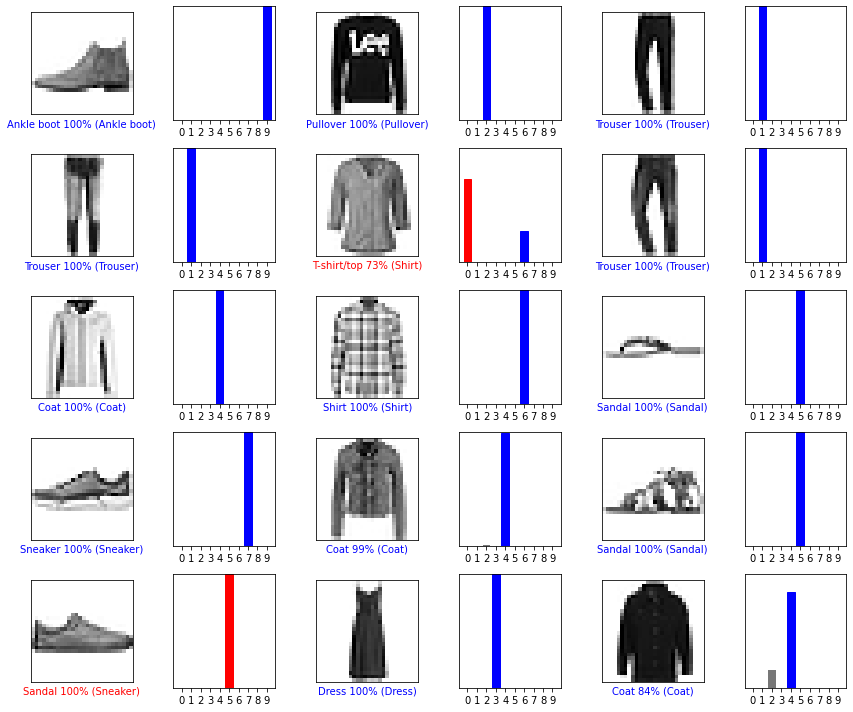

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

###11. HACEMOS UNA UNICA PREDICCION

In [40]:
img = test_images[1]

print(img.shape)

(28, 28)


In [41]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.4746142e-06 4.1830545e-23 9.9987435e-01 8.9717935e-20 1.2172479e-04
  2.4869681e-15 5.2189171e-07 3.6343356e-19 2.0235600e-20 2.0587449e-21]]


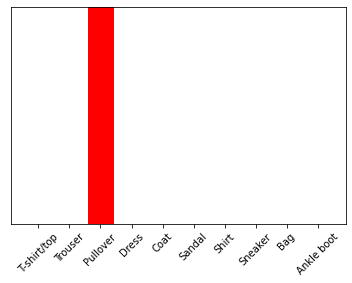

In [62]:
plot_value_array(2, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [61]:
np.argmax(predictions_single[0])

2